<a href="https://colab.research.google.com/github/2303A51908/2303A51908-Application-of-datamining/blob/main/Wine_No_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Alcohol  Proline
0    14.23     1065
1    13.20     1050
2    13.16     1185
3    14.37     1480
4    13.24      735


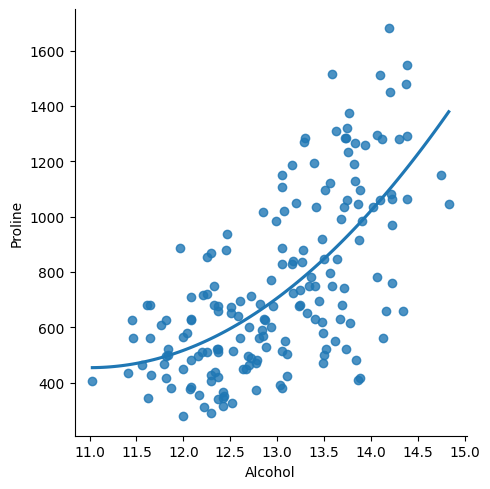

<ipython-input-4-f80a933d72e8>:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_binary.fillna(method='ffill', inplace=True)
<ipython-input-4-f80a933d72e8>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.fillna(method='ffill', inplace=True)
<ipython-input-4-f80a933d72e8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(inplace=True)


Model score: 0.431452496313669


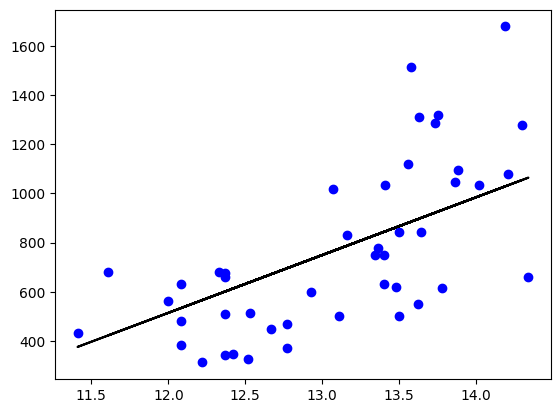

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = pd.read_csv('/content/wine.csv')
df.head()

# Select 'Alcohol' and 'Proline' columns
df_binary = df[['Alcohol', 'Proline']]
df_binary.columns = ['Alcohol', 'Proline']

# Display the first 5 rows
print(df_binary.head())

# Scatter plot to check relationship between Alcohol and Proline
sns.lmplot(x='Alcohol', y='Proline', data=df_binary, order=2, ci=None)
plt.show()

# Handle missing values
df_binary.fillna(method='ffill', inplace=True)

# Prepare data for regression
X = np.array(df_binary['Alcohol']).reshape(-1, 1)
y = np.array(df_binary['Proline']).reshape(-1, 1)

# Drop rows with missing values
df_binary.dropna(inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Perform linear regression
regr = LinearRegression()
regr.fit(X_train, y_train)

# Print model score
print("Model score:", regr.score(X_test, y_test))

# Predict and plot results
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color='b')
plt.plot(X_test, y_pred, color='k')
plt.show()